In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('../data/Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#Basic Info
print('Shape of dataset:',df.shape)
print('DataTypes')
print(df.dtypes)
print('Missing Values')
print(df.isnull().sum())


Shape of dataset: (2200, 8)
DataTypes
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object
Missing Values
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [4]:
# Stastical Summary 
df.describe().T  #T is used for transposing that row as column and column as row 
#When SD is high there is more spredness 
# When we have less sd the data is normally distributed 

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [5]:
# Target Variable Analysis 
df['label'].value_counts() # We have checked the values present in the label column. 

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

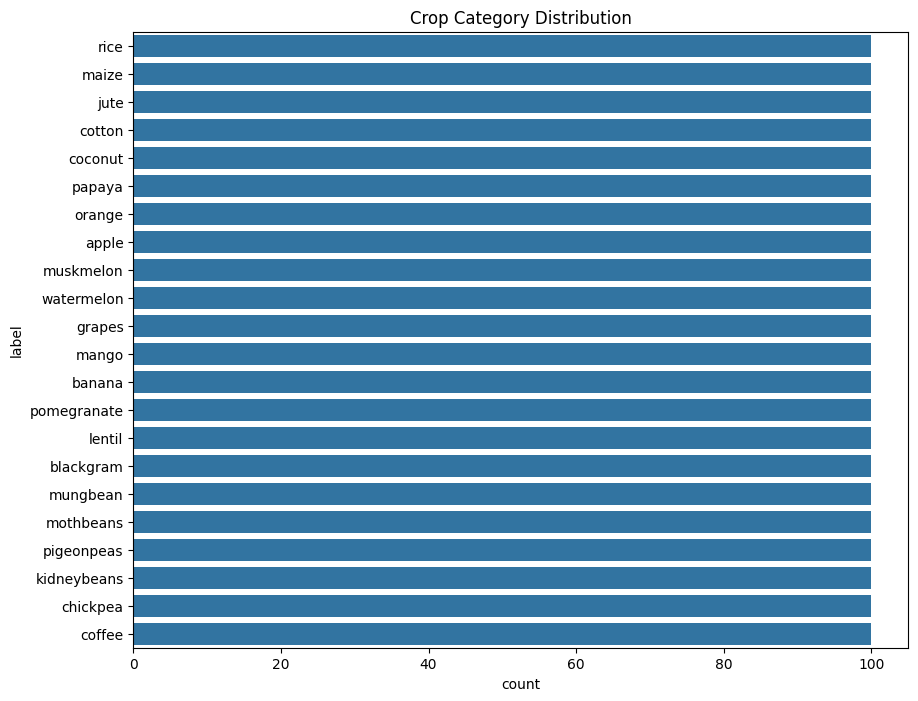

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['label'],order=df['label'].value_counts().index)
plt.title('Crop Category Distribution')
plt.show()

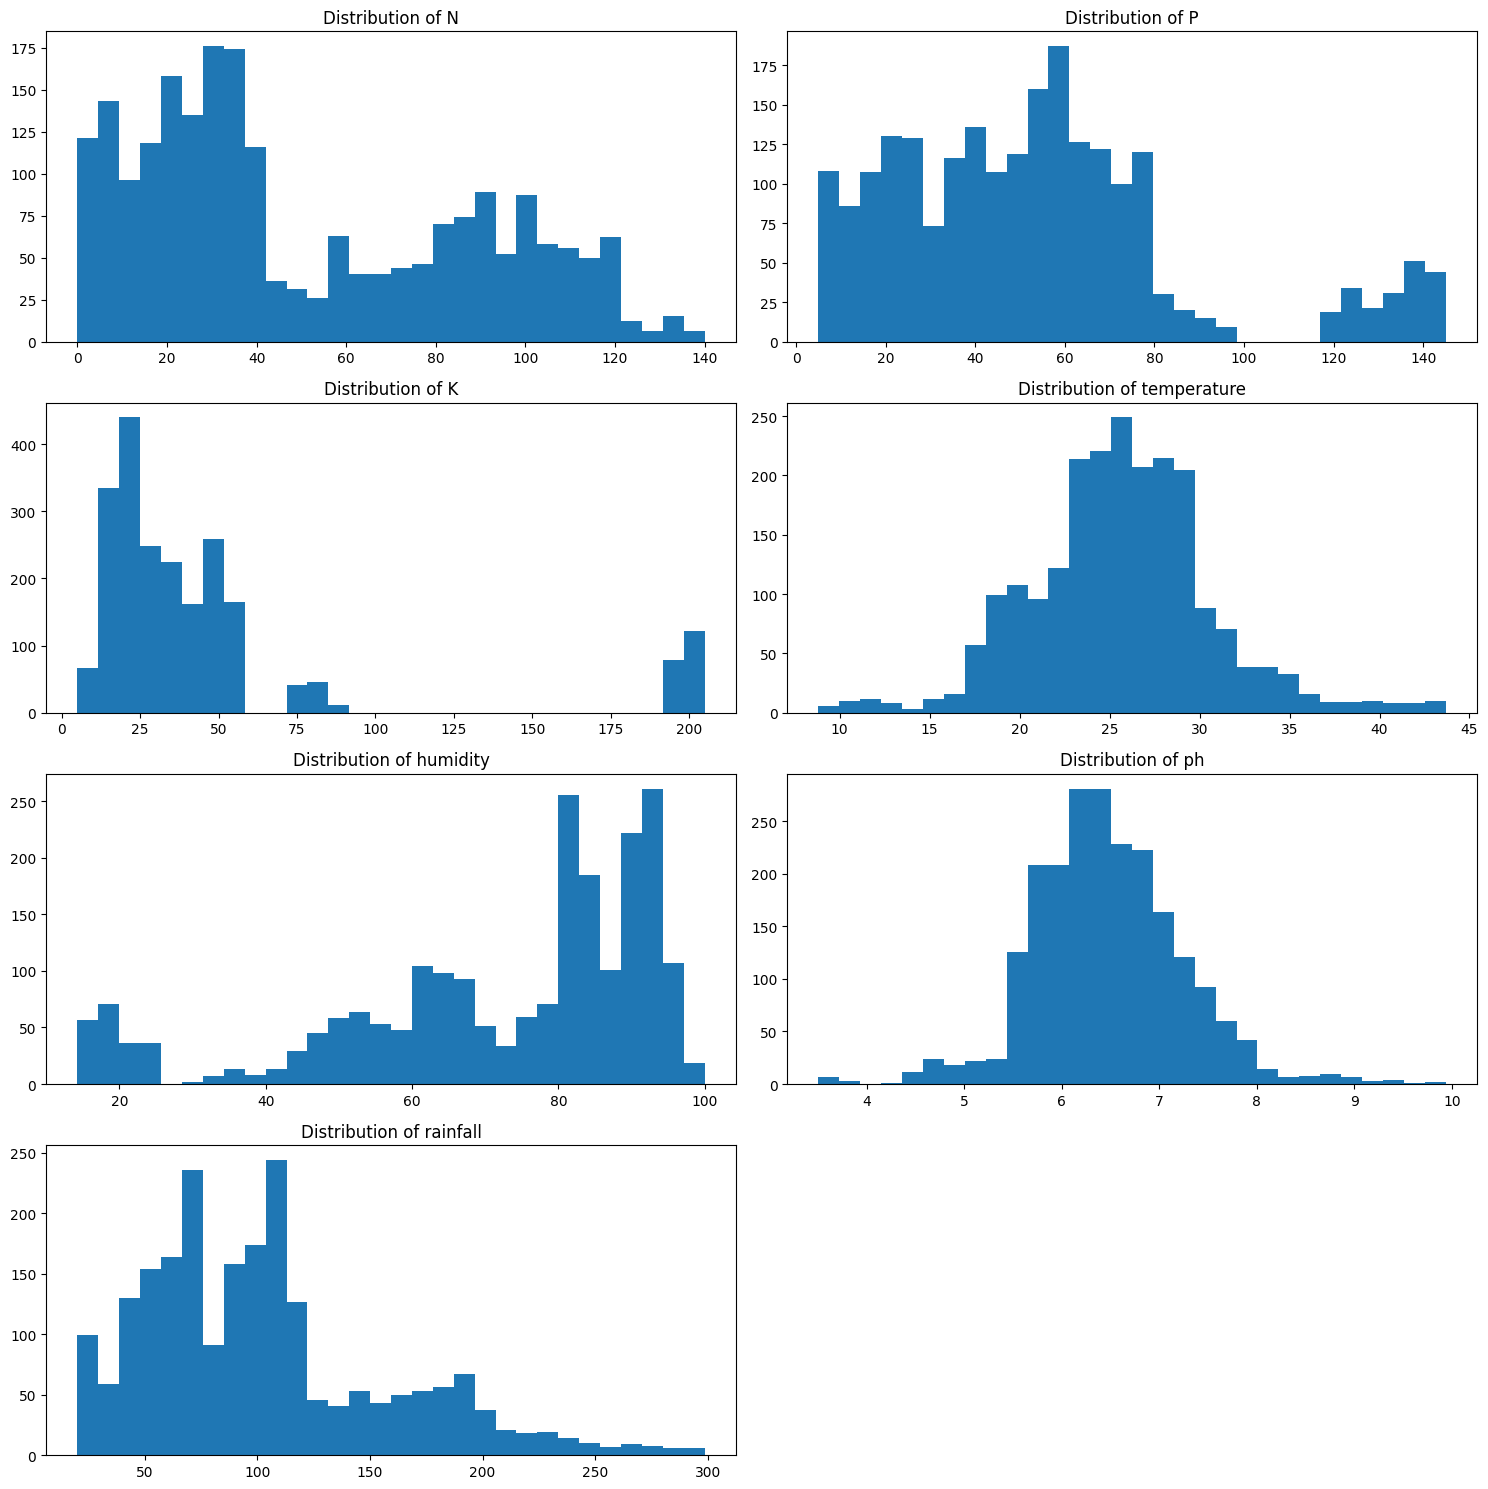

In [7]:
num_cols=['N','P','K','temperature','humidity','ph','rainfall']
plt.figure(figsize=(15,15))
for i,col in enumerate(num_cols,1):
    plt.subplot(4,2,i)
    plt.hist(df[col],bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

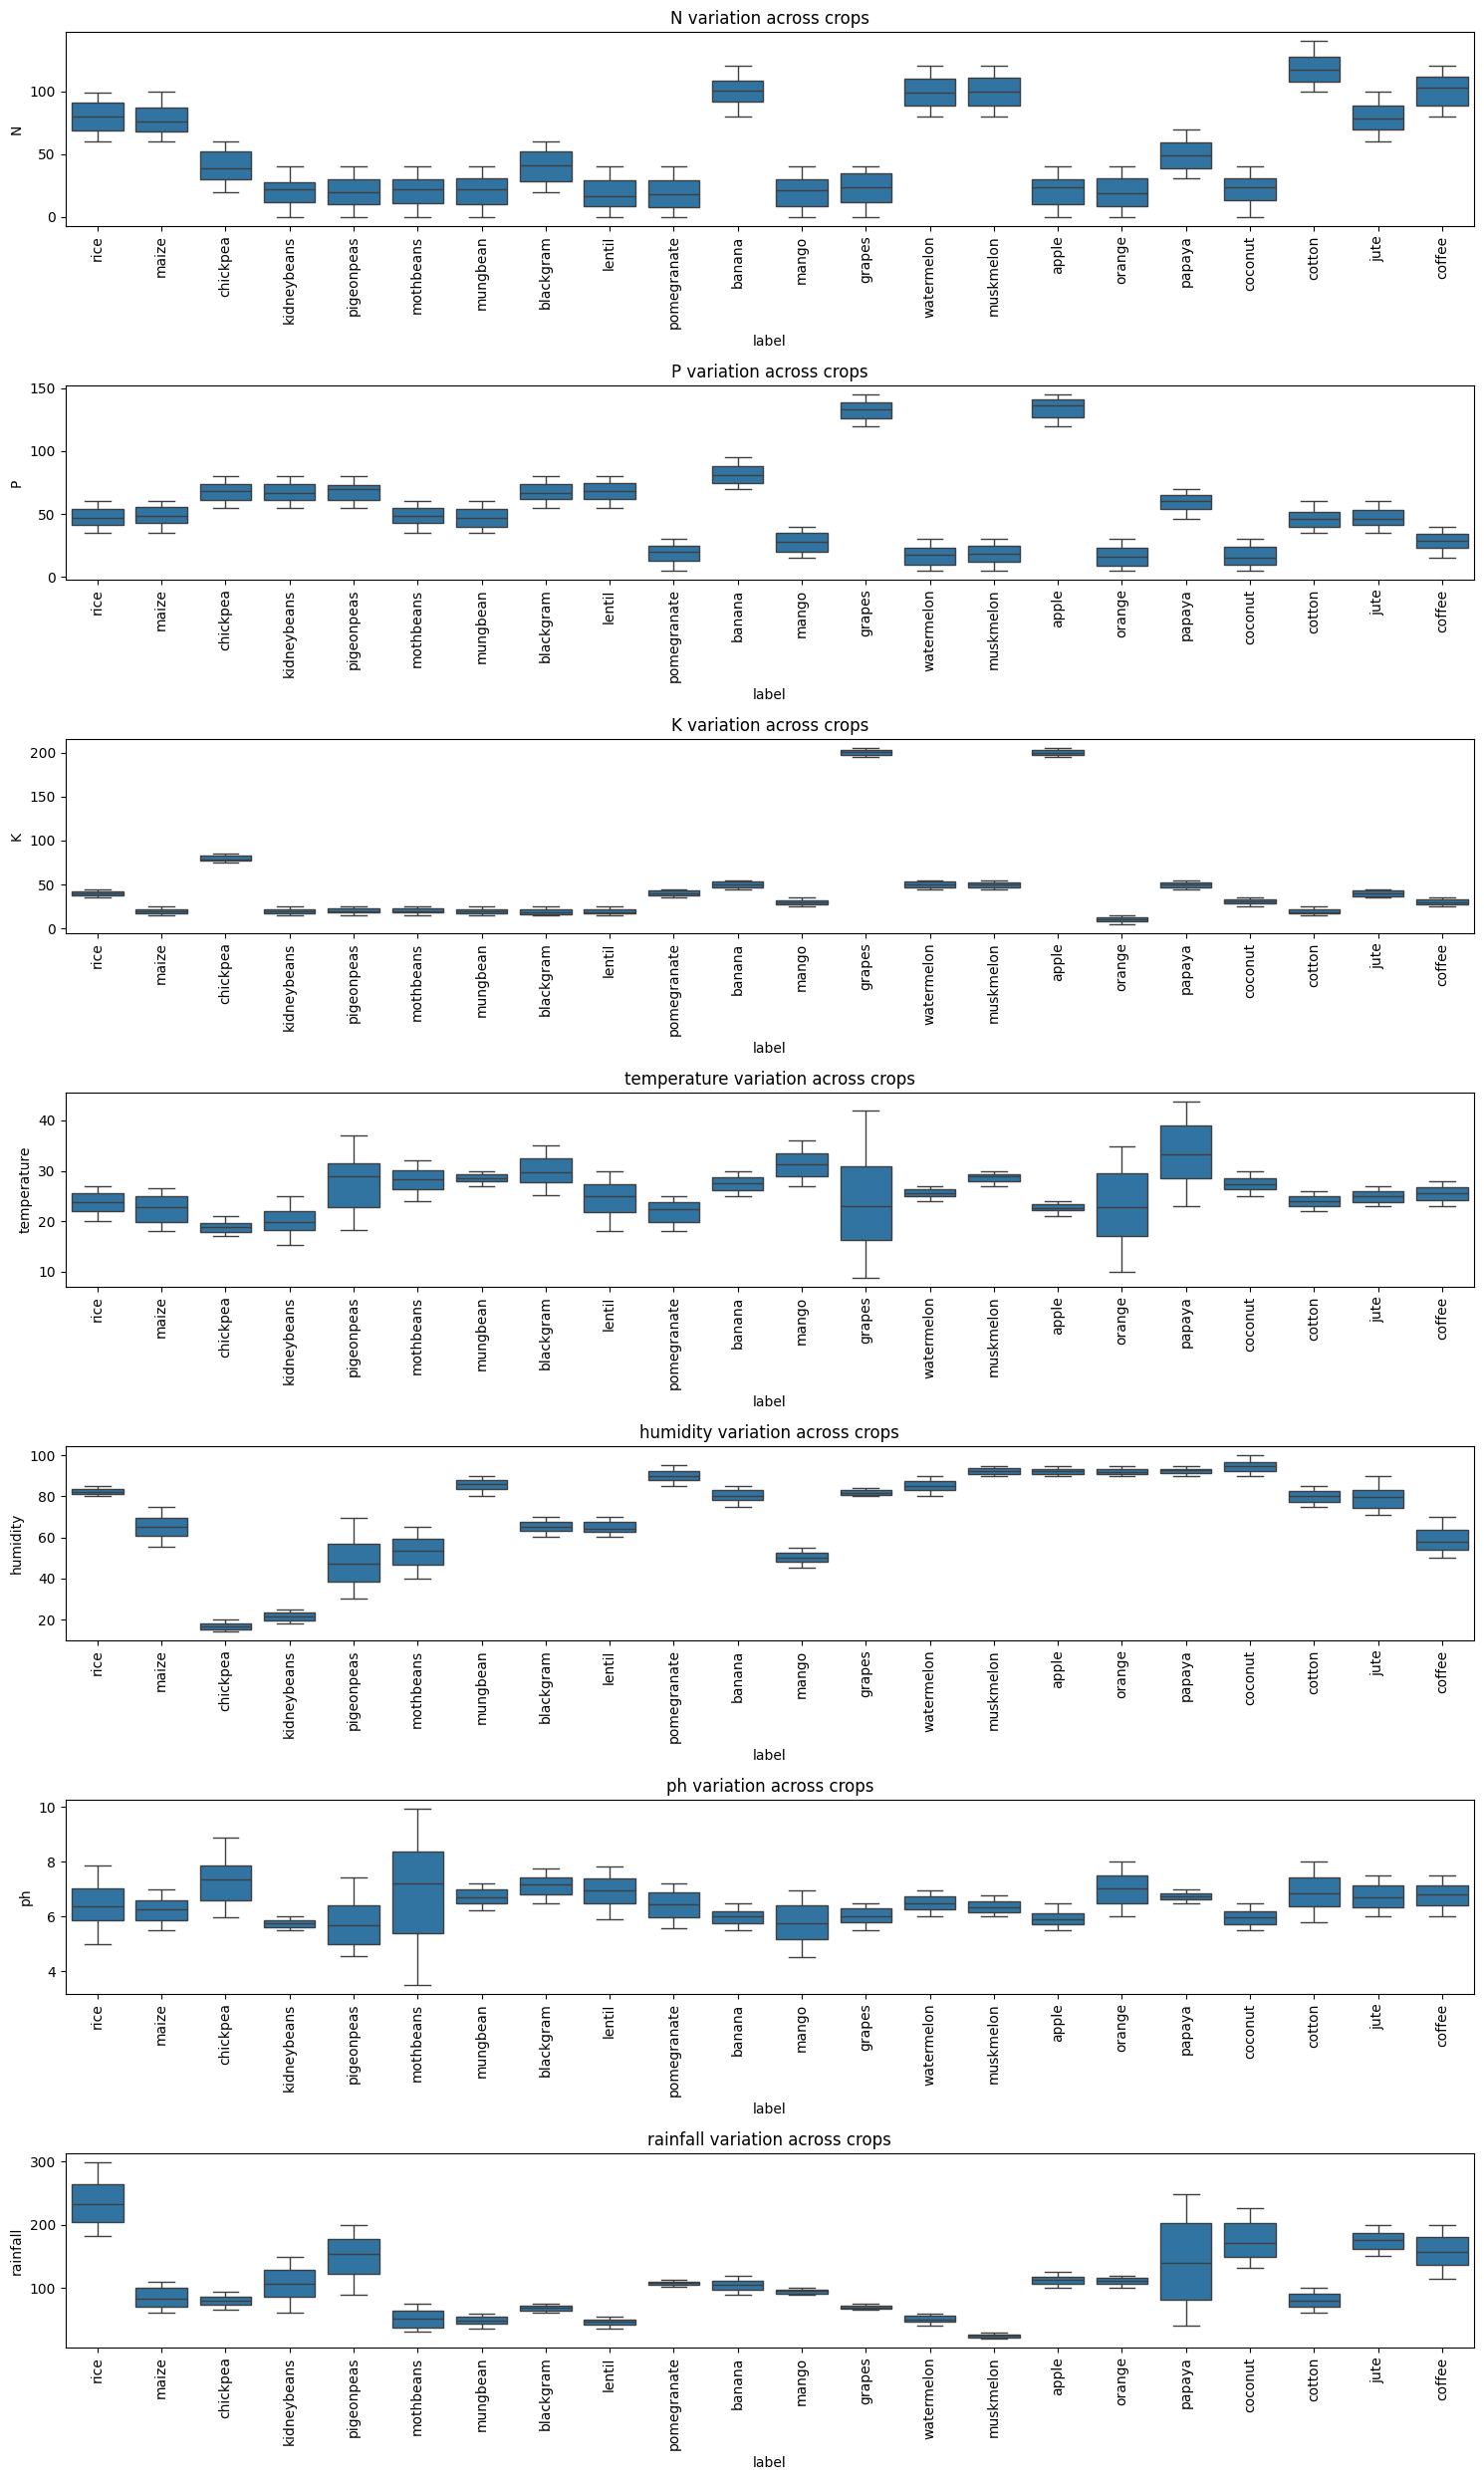

In [8]:
plt.figure(figsize=(15, 25))
for i, col in enumerate(num_cols, 1):
    plt.subplot(7, 1, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f"{col} variation across crops")
plt.tight_layout()
plt.show()

# When the box plot size is big more or tall the amount required is high and when the box is short it requires less amount 

In [ ]:
#Corelation Analysis Through Heat Map 
# Color Interpretation 
#Yellow/Light green- High positive correlation 

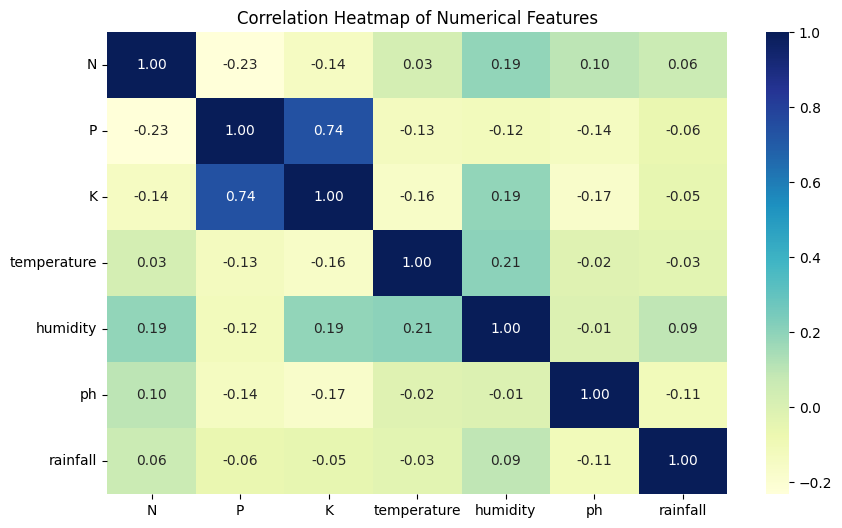

In [17]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.2f') # annot is used to represent the values present inside the box
plt.title('Correlation Heatmap of Numerical Features')
plt.show()
# 1 represents the showing corelation with each other so it shows 1 that is temp=temp that is why it shows 1 